## Counting 

Counting forms the basis of finite uniform probability measures, but is also fundamental to Discrete Mathematics and [Combinatorics](https://en.wikipedia.org/wiki/Combinatorics) in particular. In this notebook, we will be counting [graphs](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)) which are mathematical structures used to model pairwise *relationships* between *objects*. For example, a graph can represent a group of people and their friendships, i.e. a social network. The objects in a graph are called *nodes* or *vertices* and are represented by a *set* $V$, and their relations are called *edges* and are represented by a set of *pairs* of nodes  $E \subseteq \{ \{i, j\};  i,j \in V \}$. For this notebook we will use the [networkx](https://networkx.org/) package in Python to specify and visualize graphs, like the one below. (The package also contains a wealth of algorithms for working with graphs.)

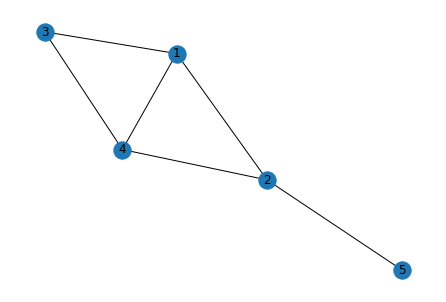

In [1]:
import networkx as nx  
G = nx.Graph()                           # initialize graph
G.add_nodes_from( range(1,6) )           # add nodes
G.add_edges_from( [{1,2}, {1,3}, {1,4},  # add edges 
                   {3,4}, {4,2}, {5,2} ])
nx.draw(G, with_labels = True)          # draw graph

The node/vertice set for this graph is $V = \{1,2,3,4,5\}$, and the edge set is $E=\{ \{1,2\}, \{1,3\}, \{1,4\}, \{2,4\}, \{2,5\}, \{3,4\} \}$. <br>
Alternatively, a graph may be specified by its [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix), which is a square ($n \times n$) matrix with $0/1$ values representing the presence/absence of an edge between the row and column indices. For example, the graph above has adjacency matrix:

<img src="./img/2/adjacency_mat.svg" alt="adjacency matrix" style="width: 200px;"/>

In [2]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 1., 1., 0.],
        [1., 0., 0., 1., 1.],
        [1., 0., 0., 1., 0.],
        [1., 1., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

Note that the matrix is *symmetric*, i.e. if there is an edge from $i$ to $j$, there is one from $j$ to $i$. Both perspectives (sets & adjacency matrices) will help us count the number of possible graphs of different types.

#### Labeled Graphs

We first look at graphs with *labeled/distinguishable* nodes, since they are easier to count. (In unlabeled graphs, node identities don't matter, only the edge structure.) 

##### Simple graph
A simple graph has no repeated edges or loops (edges from a node to iteself). With $n$ nodes, there are a total of 
$$ 2^{ {n \choose 2} } = 2^{n(n-1)/2} $$
different graphs, since there are $ {n \choose 2} $ possible pairs of nodes, and each can be an edge or not (2 choices for each pair). Another way to look at it is through the adjacency matrix: due to symmetry there are $n(n-1)/2$ uniquely determined off-diagonal elements (e.g. elements of the top-right triangle), with two options (0/1) each. Note that for this count, we do not require all nodes to be [connected](https://en.wikipedia.org/wiki/Connectivity_(graph_theory)).

##### Loops
If the graph contains [loops](https://en.wikipedia.org/wiki/Loop_(graph_theory)), then there are 
$$ 2^{ {n \choose 2} + n } $$
different graphs, since there are $n$ additional possible loop edges, i.e. pairs of the form $\{i,i\}$ (or diagonal elements of the adjacency matrix).

##### Digraphs

[Directed graphs](https://en.wikipedia.org/wiki/Directed_graph), or *digraphs*, are graphs whose edges are *directional*, i.e. we differentiate between an edge from $i$ to $j$ and an edge from $j$ to $i$. Directional edges are represented by *ordered* pairs of nodes, and drawn as *arrows*:

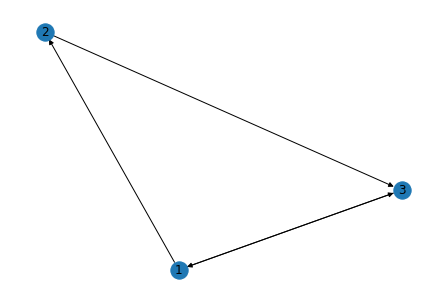

In [3]:
D = nx.DiGraph()
D.add_nodes_from( range(1,3) )
D.add_edges_from( [ (1,2), (1,3), (2,3), (3,1) ] )
nx.draw(D, with_labels = True)

The adjacency matrix of a digraph is no longer symmetric: the $(i,j)^{th}$ entry represents an arrow from $i$ to $j$, and vice-versa:

In [4]:
nx.to_numpy_matrix(D)

matrix([[0., 1., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])

Therefore, there are $2^{n(n-1)}$ possible labeled digraphs. 

##### Path Graphs

A [path graph](https://en.wikipedia.org/wiki/Path_graph) connects all nodes in a "sequence", e.g.:


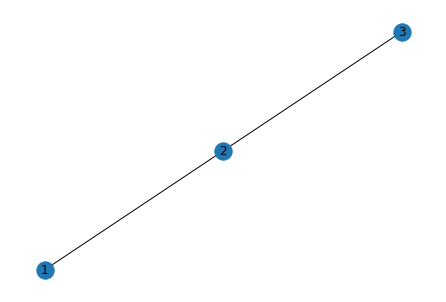

In [5]:
G.clear()
G.add_nodes_from( range(1,3) )           
G.add_edges_from( [{1,2}, {2,3} ])
nx.draw(G, with_labels = True) 

The number of labeled path graphs is *not* equal to $n!$, i.e. the number of node arrangments (permutations). Note that the (undirected) graphs $(1-2-3)$ and $(3-2-1)$ are considered identical, i.e. there is no notion of start or finish. <br>
Here we use an *overcounting* strategy to find the total number of labeled path graphs of $n$ nodes. The strategy involves counting more complex structures than required, and then adjusting the count by division or subtraction. In our case, there are $n!$ paths with specified beginning and end, and by dividing this count by 2 (for either direction) we get the desired result 
$$\frac{n!}{2}$$
(Note: the number of *directed* path graphs, which have a natural beggining and end, is $n!$).

#####  Bipartite Graphs

A [bipartite graph](https://en.wikipedia.org/wiki/Bipartite_graph) (or bigraph) is one whose vertices can be partitioned into two sets $V_1, V_2$ so that is every edge only connects nodes *between* the sets

<img src="./img/2/bigraph.svg" alt="bipartite graph" style="width: 200px;"/>

The adjacency matrix of a bigraph has a special structure, with $0$'s within the disjoint sets of nodes, and possible $1$'s only between them:
<img src="./img/2/bigraph_adj.svg" alt="bigraph_adjacency_matrix" style="width: 200px;"/>
(The rows and columns of the matrix have been re-order so that the node sets appear contiguous, but that is not necessary.)


For fixed $m \in \{1,\ldots, n-1\}$, there are ${n \choose m}$ ways to partition $n$ nodes into sets of size $m$ and $n-m$,  and $m \cdot (n-m)$ potential edges with 2 choices each (rectangle in adjacency matrix). Hence, there are ${n \choose m} 2^{m(n-m)}$ such (labeled) bigraphs of sets sizes $m$ and $(n-m)$. Nevertheless, counting *all* bigraphs for all $m$ is more involved (e.g. a totally disconnected graph is a digraph for *any* value of $m$, and would therefore be over-counted).

##### Complete Bipartite Graphs

A [complete bigraph](https://en.wikipedia.org/wiki/Complete_bipartite_graph) has *every* node in one set connected to *every* node in the other set:
<img src="./img/2/complete_bigraph.svg" alt="bipartite graph" style="width: 200px;"/>

Note that for given node sets, there is only *one* complete bigraph. Therefore, the number of (labeled) complete graphs is just the number of ways to split $n$ nodes into two sets. Here we use another counting strategy: breaking up the problem into disjoint and exhaustive cases, and adding their counts to get the total. <br>
The sizes of the node sets must sum up to $n$, so there are $\lfloor n/2 \rfloor$ *distinct* partition sizes  (b/c $ \{m,n-m\} = \{n-m,m\}$): 
$$ \{1,n-1\}, \{2,n-2\}, \ldots, \{ \lfloor n/2 \rfloor, n - \lfloor n/2 \rfloor \} ,$$
where $\lfloor n/2 \rfloor$ is the [floor function](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions). The total number of labeled complete bipartite graphs is:
$$ \sum_{i=1}^{\lfloor n/2 \rfloor} { n \choose m}$$


##### Connected Graphs

A [connected graph](https://en.wikipedia.org/wiki/Connectivity_(graph_theory)#Connected_vertices_and_graphs) has a path between any two nodes or, in other words, it has no isolated [subgraphs](https://en.wikipedia.org/wiki/Induced_subgraph); e.g., every complete graph is connected. The number of connected graphs cannot be found directly by multiplication/factorials, so we will employ a more advanced strategy of  deriving a *recurrence relation*, which can be solve iteratively. <br>
Let $C_k$ be the number of connected graphs with $k$ nodes. There are $2^{ {n \choose 2} }$ possible simple graphs of $n$ nodes, and we can partition them into $n$ classes as follows: Fix a node, say $1$, and considered the maximal *connected subgraph* containing that node:
<img src="./img/2/connected_subgraph.svg" alt="connected subgraph decomposition" style="width: 200px;"/>
In the plot above, node $1$ belongs to an isolated, connected subgraph of size $k$, and the remaining nodes belong to another *not necessarily connected*  subgraph. There are ${n-1 \choose k-1}$ ways to select the $k-1$ nodes (besides node $1$), and $C_k$ ways to form the connected subgraph, according to our assumption. And, independently, there are $2^{ {n-k \choose 2} }$ ways to form the other subgraph. If combine all possible sizes $k=1,\ldots,n$ of connected subgraphs containing node $1$, we get the total number of simple labeled graphs, i.e.:
$$ \sum_{k=1}^{n} { n-1 \choose k-1 } C_k 2^{ { n-k \choose 2 } } = 2^{ {n \choose 2} } $$
This relation can be used iteratively, for $C_1=1$ and increasing $n=2,\ldots$, to find values of $C_n$. The sequence of solutions is available at [OEIS](http://oeis.org/A001187/list) (*On-Line Encyclopedia of Integer Sequences*). E.g., for $n=3$ we have $C_3=4$, verified by:
<img src="./img/2/C_3.svg" alt="connected graphs of size 3" style="width: 300px;"/>


#### Unlabeled Graphs

So far we only looked at labeled graphs, i.e. graphs with distinguishable nodes. In many cases, the labeling of the nodes is not relevant, only the "structure" of the graph. For example, there are only 2 different unlabeled connected graphs of 3 nodes, the "path" and the "triangle":
<img src="./img/2/unlabeled_C_3.svg" alt="connected unlabeled graphs of size 3" style="width: 150px;"/>
Comparing that to the 4 labeled connected graphs, the 3 labeled "path" graphs are all equivalent to 1 unlabeled "path". The 3 labeled "path" graphs are called [isomorphic](https://en.wikipedia.org/wiki/Graph_isomorphism), because they have the same *shape*, i.e. you can rearrange their labels and get the same graph. With unlabeled graphs, we are essentially counting [equivalence classes](https://en.wikipedia.org/wiki/Equivalence_class) under isomorphism.

Counting unlabeled graphs is hard, because there are varying numbers of isomorphic labeled graphs of each type. In the above example, there are 3 isomorphic "path" graphs, but only one "triangle" graph. Nevertheless, we can easily find a lower bound on the number of unlabeled simple graphs, since there are at most $n!$ permutations/rearrangements of the labels. Therefore, there are *at least*
$$ \frac{ 2^{ {n \choose 2} } } {n!} $$
simple unlabelled graphs, and this lower bound becomes tighter as $n$ increases (there are fewer isomorphisms as the graphs get larger). The are more sophisticated ways to count simple unlabeled graphs, whose counts are given [here](http://oeis.org/A000088). You can verify the count for $n=3$ from the plot below: 


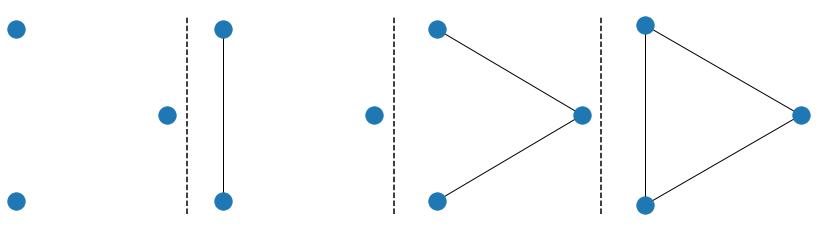

In [6]:
U = nx.graph_atlas_g() # Returns the list of all unlabeled graphs of up to seven nodes 
                       # unlabeled graphs with 3 nodes are in U[4:7] 

import matplotlib.pyplot as plt 
plt.subplot(1,4,1)
nx.draw(U[4],  pos = nx.circular_layout(U[4]) )
plt.vlines(1.2,-1,1, color = 'k', linestyles = 'dashed')
plt.subplot(1,4,2)
nx.draw(U[5], pos = nx.circular_layout(U[4]) )
plt.vlines(1.2,-1,1, color = 'k', linestyles = 'dashed')
plt.subplot(1,4,3)
nx.draw(U[6], pos = nx.circular_layout(U[4]) )
plt.vlines(1.2,-1,1, color = 'k', linestyles = 'dashed')
plt.subplot(1,4,4)
nx.draw(U[7], pos = nx.circular_layout(U[4]) )

plt.subplots_adjust( right = 2, wspace=.1 )
plt.show()

### Problems

1. Find the number of labeled, directed graphs of node size $n$ *including* possible loops.
2. Find the number of simple [complete graphs](https://en.wikipedia.org/wiki/Complete_graph), either labeled or unlabeled.
3. A directed, complete graph is called a [tournament](https://en.wikipedia.org/wiki/Tournament_(graph_theory)). Find the number of labeled tournaments of node size $n$.
4. In a labeled *complete* graph of size $n$, show that the number of paths of length $0 \le k \le n-2 $ between two nodes is $ \frac{ (n-2)! }{(n-2-k)! }$.
5. Use 4. to show that the total number of paths between two nodes in a labeled complete graph of size $n$ is 
$  \lfloor e \cdot (n−2)!  \rfloor$


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.